## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## Compute the camera calibration using chessboard images

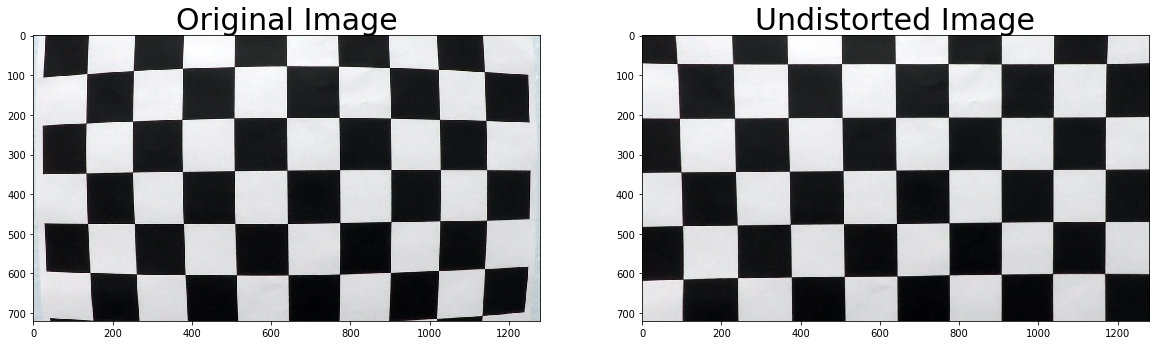

In [31]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
import os
%matplotlib qt
%matplotlib inline

    
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(8,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        #img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        #cv2.imshow('img',img)
        #cv2.waitKey(500)

cv2.destroyAllWindows()

# Load image to get image shape
img = cv2.imread(images[0])
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

#Test undistortion on an image
dst = cv2.undistort(img, mtx, dist, None, mtx)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_cal/wide_dist_pickle.p", "wb" ) )

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)
plt.show()

## Apply a distortion correction to raw images.

In [33]:
def undistort(img, mtx, dist):
    """ Distortion correct image, using camera calibration mtx and dist.
    """
    undist_img = cv2.undistort(img, mtx, dist, None, mtx)
    return undist_img

# Create undistorted directory, if it doesn't exist
undistorted_dir = 'output_images/undistorted/'
if not os.path.exists(undistorted_dir):
    os.mkdir(undistorted_dir)

# Make a list of test images
testimages = glob.glob('test_images/*.jpg')

# set to 1 to display plots of all images
debug_plots = 0

# Step through the list and apply distortion correction
for fname in testimages:
    img = cv2.imread(fname)
    filename = os.path.basename(fname)
    dst = undistort(img, mtx, dist)
    cv2.imwrite(undistorted_dir+filename,dst)
    if debug_plots:
        # Visualize undistortion
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
        ax1.imshow(img)
        ax1.set_title('Original Image', fontsize=30)
        ax2.imshow(dst)
        ax2.set_title('Undistorted Image', fontsize=30)
        plt.show()

## Apply a perspective transform to rectify binary image ("birds-eye view").

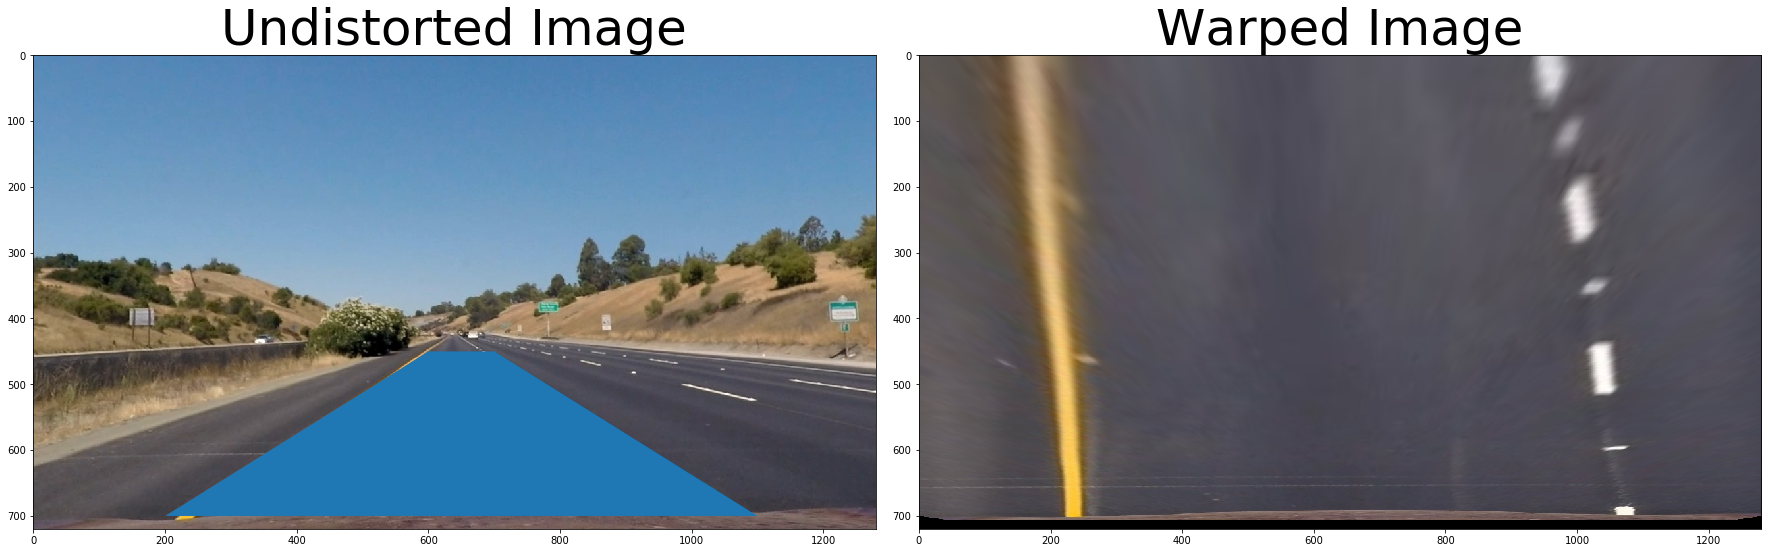

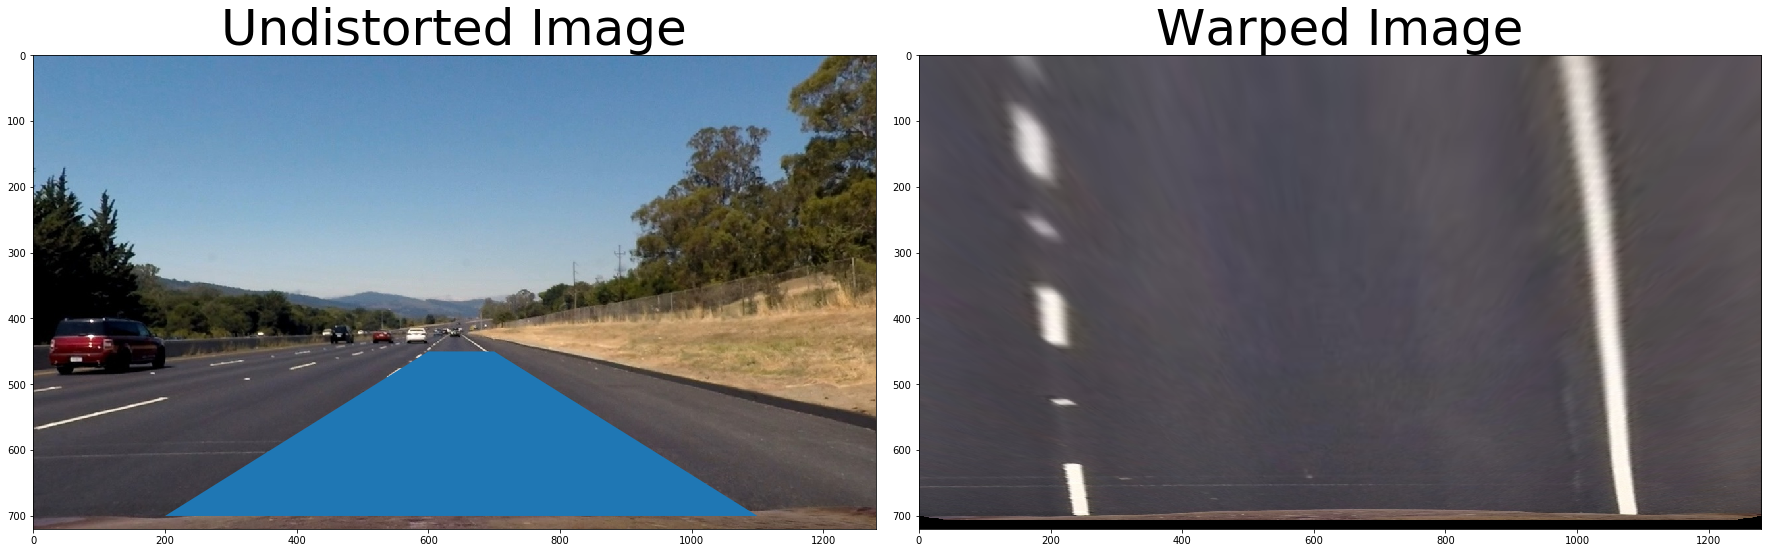

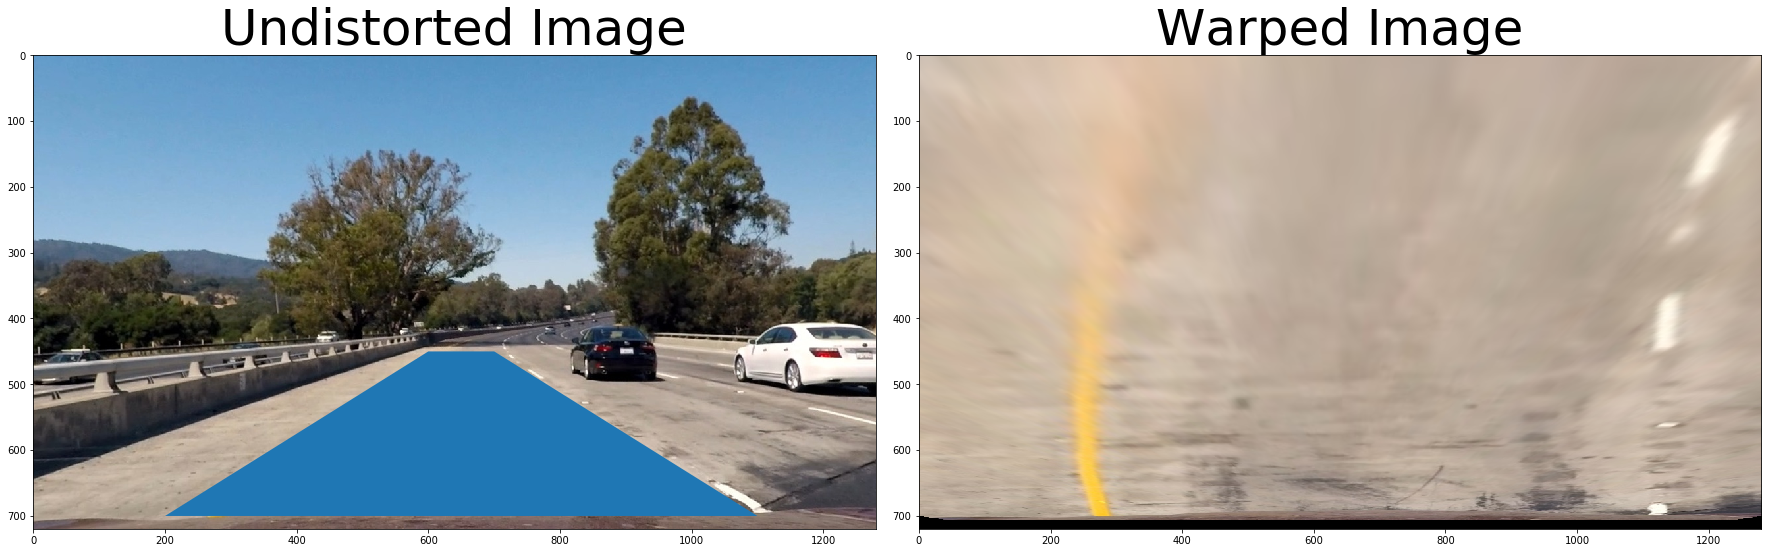

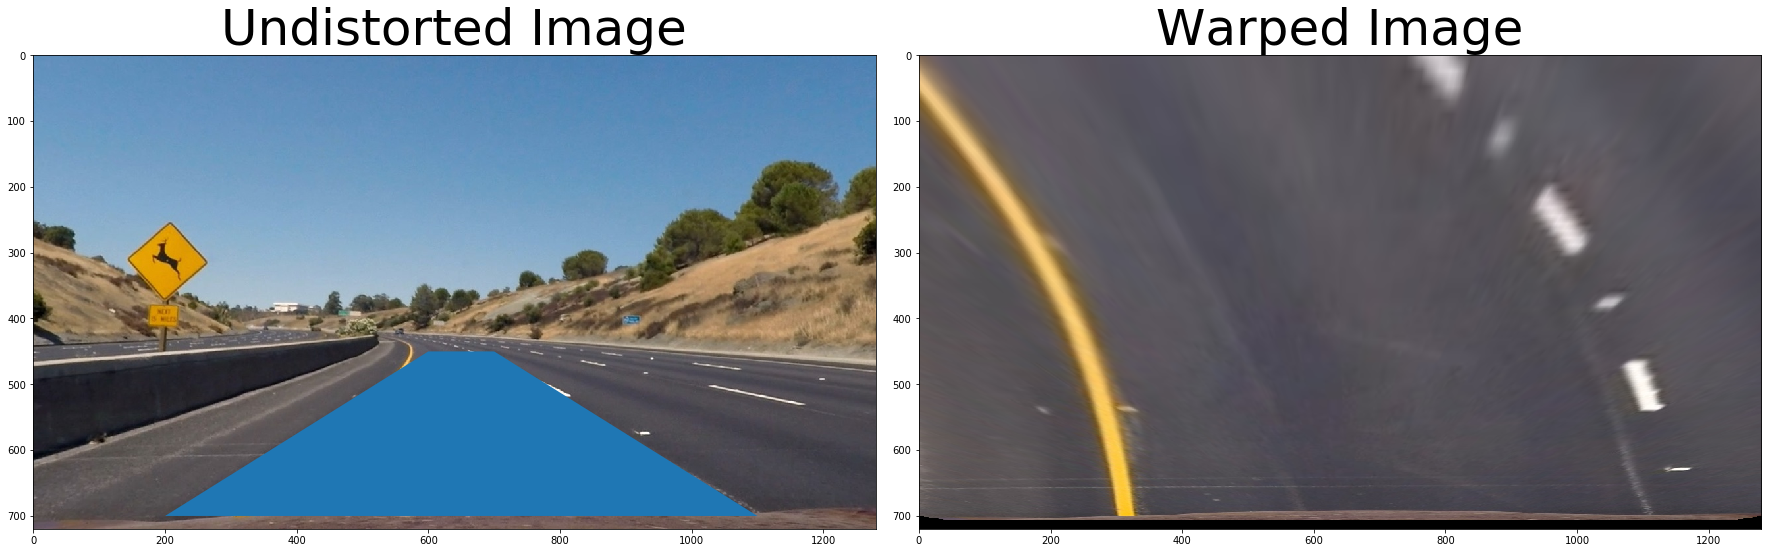

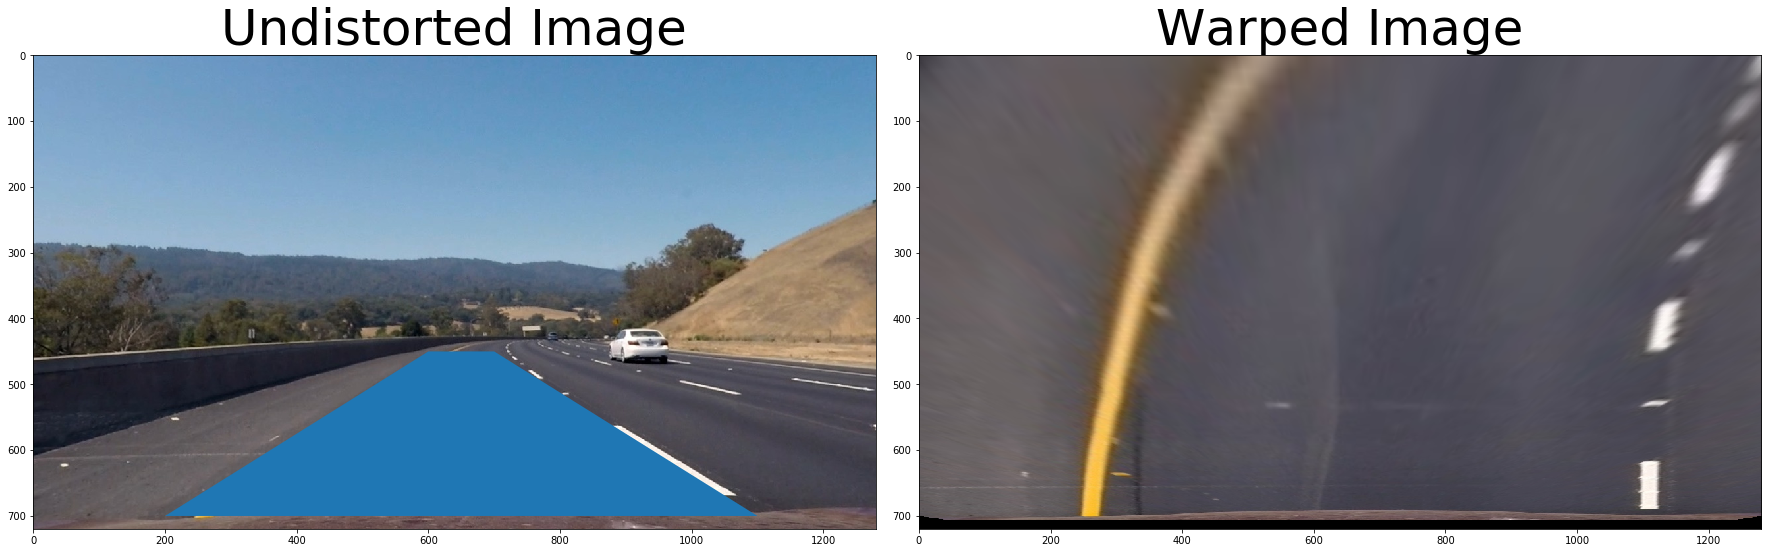

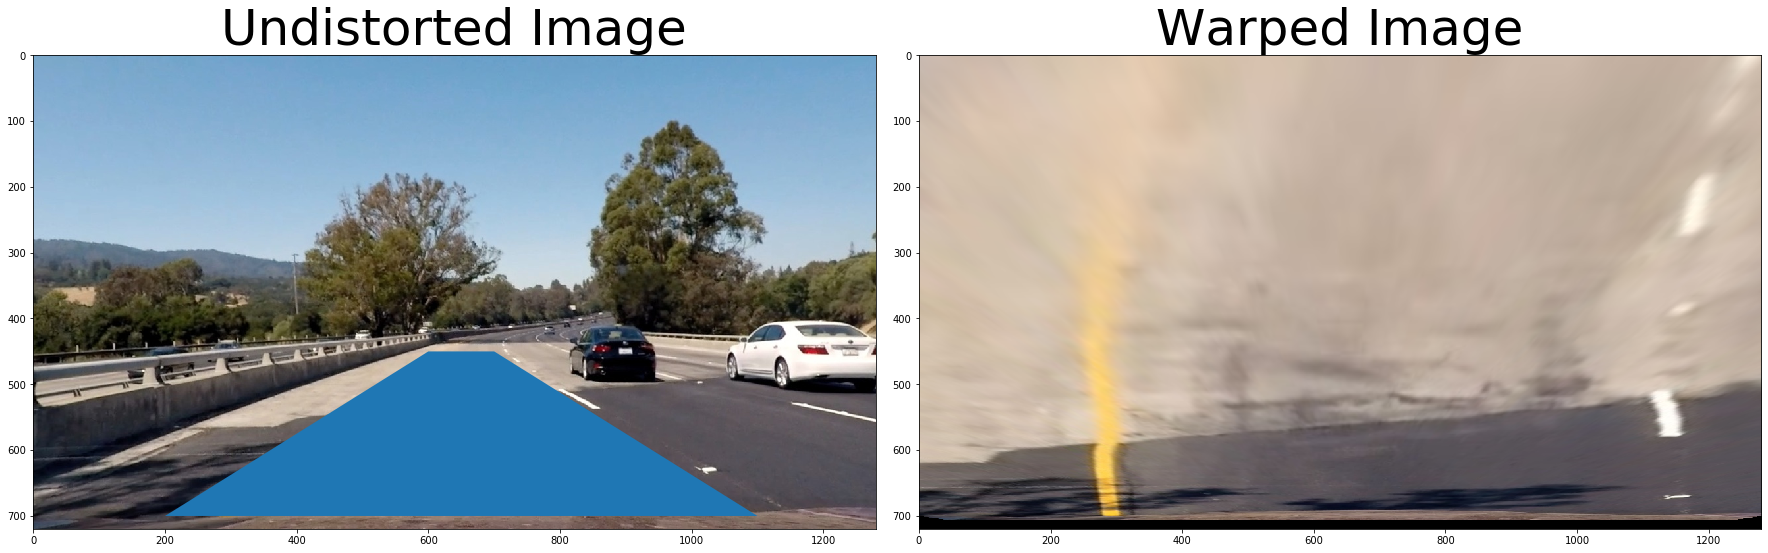

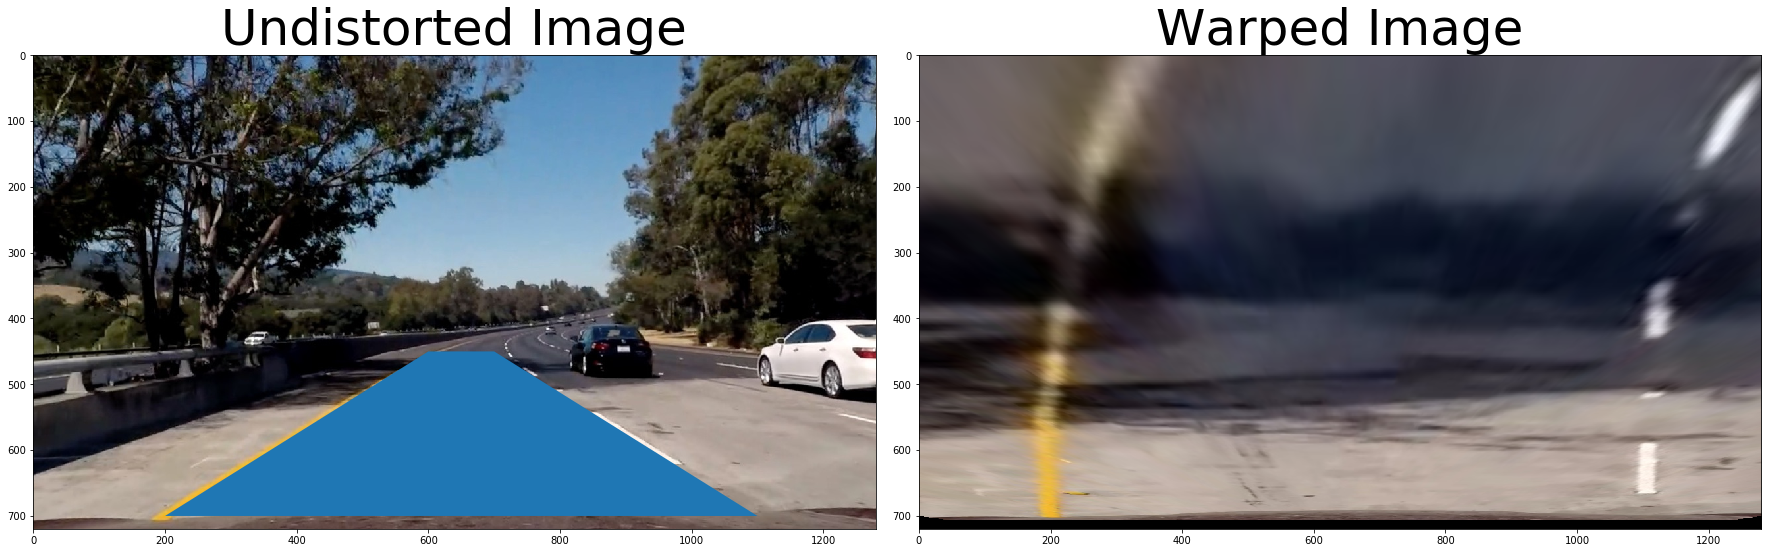

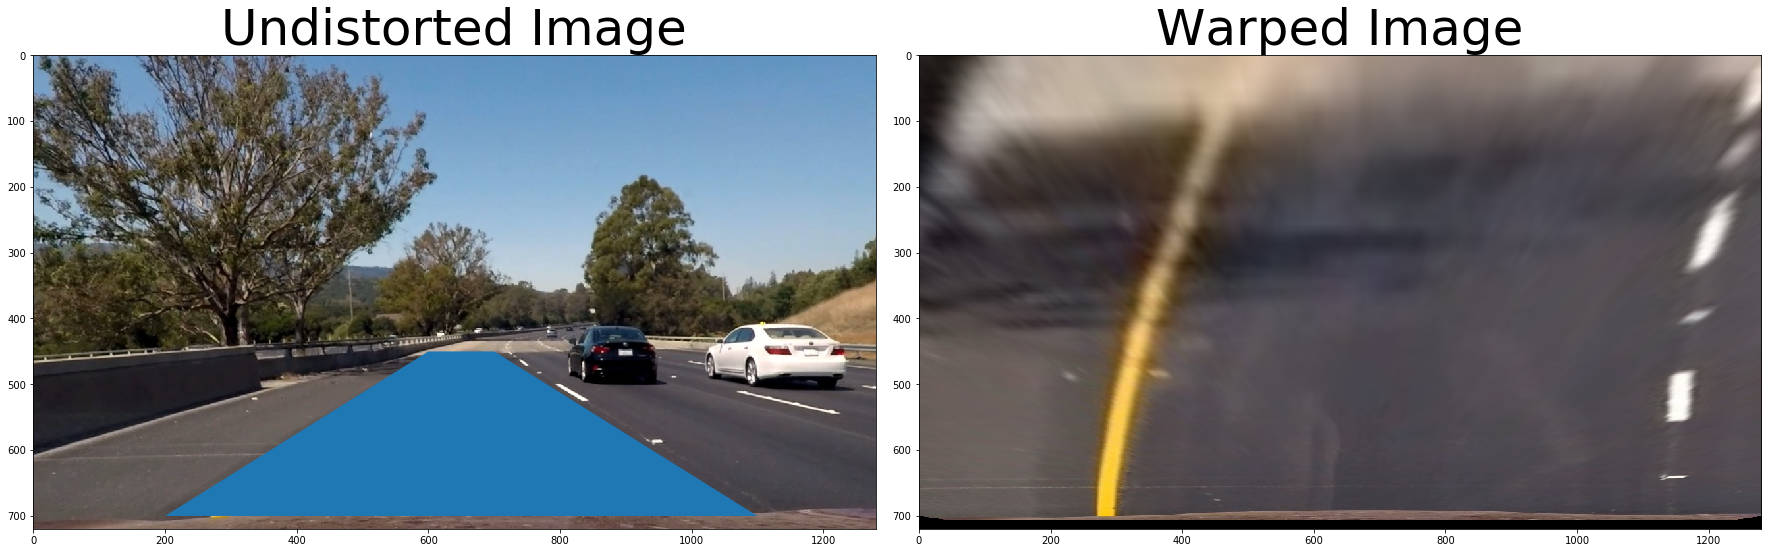

In [52]:
# Create unwarped directory, if it doesn't exist
unwarped_dir = 'output_images/unwarped/'
if not os.path.exists(unwarped_dir):
    os.mkdir(unwarped_dir)

# Make a list of undistorted images
undistimages = glob.glob(undistorted_dir+'*.jpg')

# set to 1 to display plots of all images
debug_plots = 1

# define 4 source points src = np.float32([[,],[,],[,],[,]])
src = np.float32([[200,700],[600,450],[700,450],[1100,700]])
# define 4 destination points dst = np.float32([[,],[,],[,],[,]])
dst = np.float32([[200,700],[200,0],[1100,0],[1100,700]])

M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)

# Step through the list and apply perspective transform
for fname in undistimages:
    img = cv2.imread(fname)
    filename = os.path.basename(fname)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    cv2.imwrite(unwarped_dir+filename,warped)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    warped = cv2.cvtColor(warped,cv2.COLOR_BGR2RGB)
    if debug_plots:
        
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
        f.tight_layout()
        poly = plt.Polygon(src)
        ax1.add_patch(poly)
        ax1.imshow(img)
        ax1.set_title('Undistorted Image', fontsize=50)
        ax2.imshow(warped)
        ax2.set_title('Warped Image', fontsize=50)
        plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
        plt.show()

## Use color transforms, gradients, etc., to create a thresholded binary image.

## Detect lane pixels and fit to find the lane boundary.

## Determine the curvature of the lane and vehicle position with respect to center.

## Warp the detected lane boundaries back onto the original image.

## Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.